In [37]:
import climpy.aeronet_utils as aeronet
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
__author__ = 'Sergey Osipov <Serega.Osipov@gmail.com>'

# TODO: First you have to set the path with Aeronet data

In [2]:
level = 15  # set the aeronet level 1.5 or 2.0
res = aeronet.ALL_POINTS  # set the temporal resolution, all points, daily, monthly
inv = False  # choose the product, direct ovservations (AOD) or inversion (INV)

Basic staff: prepare file path, choose diag (AOD), plot

In [ ]:
# build the file path to the station
fp = aeronet.get_station_file_path('*KAUST*', level=level, res=res, inv=inv)
# read all fields into pandas
df = aeronet.read_aeronet(fp)
# pick a diag from the list of available
var_key = df.columns[3]
# or assign by hand if you know the label
var_key = 'AOD_1020nm'
# plot it
df[var_key].plot()

Slightly more user friendly and flexible utils

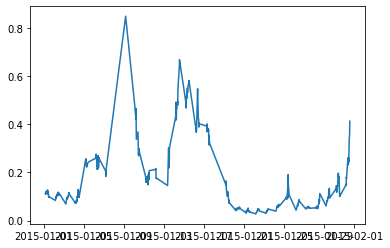

In [3]:
station='*Solar_Village*'
# use aux function to return ValueObject with the given diagnostic
aod_vo = aeronet.get_aod_diag(station, 'AOD_500nm', level=15, res=aeronet.ALL_POINTS)
# you can also apply time filter
time_range = (dt.datetime(2015, 1, 1), dt.datetime(2015, 2, 1))
aod_vo = aeronet.get_aod_diag(station, 'AOD_500nm', level=15, res=aeronet.ALL_POINTS,
                                      time_range=time_range)
# plot it
plt.figure()
plt.plot(aod_vo['time'], aod_vo['data'])

Similarly you can get the size distribution dV/dlnr from the INV product
If you want to normalize it, pass additional sd_normalization_raduis

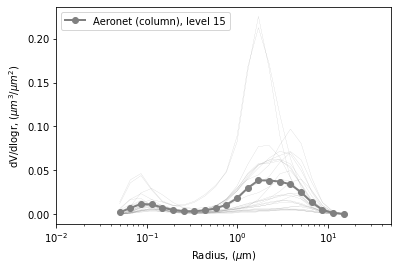

In [14]:
vo = aeronet.get_size_distribution(station, level=15, res=aeronet.ALL_POINTS,
                                   # sd_normalization_raduis=0.5,  # will normalize to 1 at 0.5 micron
                                      time_range=time_range)

plt.figure()
plt.plot(vo['radii'], np.transpose(vo['data']), '-', color='gray', lw=0.1)
# and the mean
plt.plot(vo['radii'], np.mean(vo['data'], axis=0), '-o', color='gray', lw=2, label='Aeronet (column), level {}'.format(level))

plt.xscale('log')
plt.xlim([1 * 10 ** -2, 5 * 10 ** 1])
plt.xlabel('Radius, ($\mu $m)')
plt.ylabel('dV/dlogr, ($\mu m^3$/$\mu m^2$)')
plt.legend()

# Comparison with GCMs

Suppose that you have a model (such as WRF-Chem/EMAC/CM2.1 and so on) and you want to validate simulated AOD or size distribution.
I will be using WRF-Chem as an example. Since I can't upload NetCDF file (on github), code will be commented out, but you can replace the file path with your own simulation

In [43]:
# First, lets get the list of all Aeronet stations
stations = aeronet.get_all_stations_and_coordinates()
# overview
stations

,Site_Name,Longitude(decimal_degrees),Latitude(decimal_degrees),Elevation(meters)
0,Cuiaba,-56.070214,-15.555244,234.0
1,Alta_Floresta,-56.104453,-9.871339,277.0
2,Jamari,-63.068552,-9.199070,129.0
3,Tucson,-110.953003,32.233002,779.0
4,GSFC,-76.839833,38.992500,87.0
...,...,...,...,...
1523,EIN_TAMAR,35.389232,30.945667,-368.0
1524,Sofia_IEBAS,23.386800,42.653900,631.0
1525,Chiang_Dao,98.960900,19.454722,450.0
1526,Masdar_Institute_2,54.616600,22.417503,4.0


In [51]:
# define the model domain, you can define it using WRF grid
domain = Polygon([(30, 12), (30, 30), (60, 30), (60, 12)])  # This is MENA region (Middle East and North Africa)
# filter stations within the domain
stations_inside_domain = pd.DataFrame(columns = stations.columns)
for index, row, in stations.iterrows():
    point = Point(row['Longitude(decimal_degrees)'], row['Latitude(decimal_degrees)'])
    if domain.contains(point):
        stations_inside_domain = stations_inside_domain.append(row, ignore_index=True)
# overview
stations_inside_domain

,Site_Name,Longitude(decimal_degrees),Latitude(decimal_degrees),Elevation(meters)
0,Bahrain,50.609267,26.208050,25.0
1,Solar_Village,46.397286,24.906933,764.0
2,Al_Dhafra,54.549667,24.254278,40.0
3,Kuwait_University,47.971000,29.325000,42.0
4,Mussafa,54.466667,24.371667,10.0
5,Dhabi,54.382778,24.480556,15.0
6,Umm_Al_Quwain,55.658333,25.533333,20.0
7,Abu_Dhabi,54.328889,24.476111,7.0
8,Mezaira,53.754660,23.104520,201.0
9,Al_Khaznah,55.100556,24.158611,192.0


Prepare model (WRF-Chem) data for comparison

In [22]:
from libs.file_path_utils import get_root_storage_path_on_hpc
wrf_file_path = get_root_storage_path_on_hpc() + '/Data/AirQuality/AQABA/chem_106/output/wrfout_d01_2017-07-20_00:00:00'
# put your path here
# wrf_file_path =
import netCDF4
nc = netCDF4.Dataset(wrf_file_path)
lon = nc['XLONG'][0]
lat = nc['XLAT'][0]
time =

In [57]:
station_df = stations_inside_domain.iloc[0]

'Bahrain'

In [58]:
vo = aeronet.get_aod_diag('*{}*'.format(station_df['Site_Name']), 'AOD_500nm', level=level, res=res)

In [35]:
vo.keys()

dict_keys(['data', 'time'])

## Alternative to getting list of stations from the WEB
You can loop through local files, but it is much slower and not recommend.
The advantage of this method is that you can filter station by time coverage.

In [ ]:
# First, lets get the list of all Aeronet stations
file_paths = aeronet.get_stations_file_path(aeronet.ALL_STATIONS, level=15, res=aeronet.ALL_POINTS, inv=False)


def spatial_filter(file_path):
    """
    Example of the spatial filter.
    Checks if the station is inside the polygon.
    :param file_path:
    :return:
    """
    df = aeronet.read_aeronet(file_path, only_head=True)
    point = Point(df['Site_Longitude(Degrees)'].iloc[0], df['Site_Latitude(Degrees)'].iloc[0])
    # MENA region
    polygon = Polygon([(30, 12), (30, 30), (60, 30), (60, 12)])
    return polygon.contains(point)


def spatial_and_temporal_filter(file_path):
    """
    Example of the spatial and temporal filter.
    Checks if the station is inside the polygon and if time coverage is appropriate.
    :param file_path:
    :return:
    """
    df = aeronet.read_aeronet(file_path, only_head=True)
    point = Point(df['Site_Longitude(Degrees)'].iloc[0], df['Site_Latitude(Degrees)'].iloc[0])
    # MENA region
    polygon = Polygon([(30, 12), (30, 30), (60, 30), (60, 12)])
    loc_flag = polygon.contains(point)
    time_flag = df.index[0] <= dt.datetime(2019, 1, 1)
    # TODO: we can also read last record and compare the right time interval as well

    return loc_flag and time_flag


# filter the stations inside the polygon (model domain bounds)
fps = aeronet.filter_stations(file_paths, spatial_filter)

# or add additional time filter (for example, simulations temporal extent)
fps = aeronet.filter_stations(file_paths, spatial_and_temporal_filter)

Similarly, you can loop through the file paths/stations

In [ ]:
for fp in fps:
    #print(fp)

    # get station name
    station = fp.split('/')[-1]
    # and get AOD
    aod_vo = aeronet.get_aod_diag(station, 'AOD_500nm', level=15, res=aeronet.ALL_POINTS)

    # or use generic reader
    df = aeronet.read_aeronet(fp)
